# <center>Solución Puntos Prueba de Conocimientos</center>
Nombre: John Erick Cabrera Ramirez

# 2) Método de las Diferencias Finitas

## En esta primera parte importamos las librerías que necesitaremos

In [48]:
import numpy as np
import matplotlib.pyplot as plt 

* El siguiente comando es para numerar ecuaciones

In [2]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});

<IPython.core.display.Javascript object>

In [56]:
#para guardar figuras con latex
from matplotlib import rc
plt.rc('text', usetex=True)
import seaborn as sns
plt.style.use('seaborn-poster')
sns.set_context("poster")

## Explicación del Método

La aproximación en las series de Taylor de una función f(x) alrededor de $x$ usualmente mejora cuando añadimos cada vez más términos a la serie, sin embargo, si truncamos la serie a primer orden, obtenemos una aproximación que es el cociente de dos restas:
\begin{equation}\label{eq:1}
\frac{\mathrm{d}f}{\mathrm{d}x}\approx\frac{f(x+h)-f(x)}{h},
\end{equation}
Si truncamos la serie a segundo orden, obtenemos una aproximación de la segunda derivada:
\begin{equation}\label{eq:2}
\frac{\mathrm{d}^2f}{\mathrm{d}x^2}\approx\frac{f(x+2h)-2f(x+h)+f(x)}{h^2},
\end{equation}
donde todas las restas de la forma 
\begin{equation}\label{eq:3}
f(x+b)-f(x+a),
\end{equation}
se conocen como diferencias finitas, puesto que se pueden ver, por ejemplo a primer orden, como la aproximación de finita de los diferenciales de $\mathrm{d}f$ y $\mathrm{d}x$. 
El objetivo de hoy es aproximar los términos diferenciales de una ecuación diferenencial por este método para hallar su solución. Existen diversas diferencias finitas, la mencionada acá es la diferencia finita hacia adelante.

Cada solución depende del tipo de ecuación diferencial, por esto tomaremos un ejemplo, lo resolvemos y sobre este resolvemos los coeficientes desconocidos:

## Implementación del Método

##### Sea 
\begin{equation}\label{eq:1}
f''+bf'+cf=0
\end{equation}
una ecuación diferencial con $b$,$c$ constantes. Puede ser la ecuación de un oscilador amortiguado. Aproximando a diferencias finitas:
\begin{equation}\label{eq:2}
\frac{f(x+2h)-2f(x+h)+f(x)}{h^2}+b\left(\frac{f(x+h)-f(x)}{h}\right)+cf=0
\end{equation}
La idea es que dadas unas condiciones iniciales o de frontera, en este caso $(x_0,f(x_o))$, encontremos todos los valores valor de $f(x+2h)$, para esto despejamos $f(x+2h)$ de \ref{eq:2}:
\begin{equation}\label{eq:3}
f(x+2h)=(-ch^2+bh-1)f(x)-(2+bh)f(x+h)
\end{equation}
Para encontrar todos los valores, diremos que inicialmente $x=x_0$, $f(x)=f(x_0)=f_0$, $f'(x)=f'(x_0)=f'_0$, entonces:
\begin{equation}\label{eq:4}
f_{2}=(-ch^2+bh-1)f_0-(2+bh)f_1
\end{equation}
después de n iteraciones:
\begin{equation}\label{eq:5}
f_{n+2}=(-ch^2+bh-1)f_n-(2+bh)f_{n+1}
\end{equation}
Observamos que esta ecuación requiere el valor de $f_{n+1}$ para hallar $f_{n+2}$, entonces se requiere hallar  $f_{1}$ mediante las diferencias finitas sobre la primera derivada:
\begin{equation}\label{eq:6}
f_{1}=hf'_{0}+f_0
\end{equation}
En conclusión para hallar todos los valores de f necesitamos resolver a la vez \ref{eq:5} y  \ref{eq:6}.

### Calcula el término:
\begin{equation}\label{eq:6}
f_{1}=hf'_{0}+f_0
\end{equation}

In [18]:
def f1(f_0,fd_0,h):
    return f_0+h*fd_0

### Diferencia finita

In [73]:
def finite(x_0,f_0,fd_0,b,c,n_max,h=0.1):
    f=[]
    f=np.append(f,f_0)
    f=np.append(f,f1(x_0,f_0,h))
    for n in range(2,n_max+1):
        f=np.append(f,(-c*h**2+b*h-1)*f[n-2]-(2+b*h)*f[n-1])
    return f

In [82]:
#condiciones iniciales:
x_0=0
f_0=1
fd_0=2
b=1# amortiguamiento de la ecuación
c=1#frecuencia angular al cuadrado
n_max=100 # número máximo de iteraciones
h=0.01 #paso de incremento de la variable x; presición
x=np.linspace(x_0,x_0+n_max*(h+1),n_max+1)# definimos los valores de x
y=finite(x_0,f_0,fd_0,a,b,n_max,h)
print(np.shape(x),np.shape(y))

(101,) (101,)


Text(0, 0.5, '$y$')

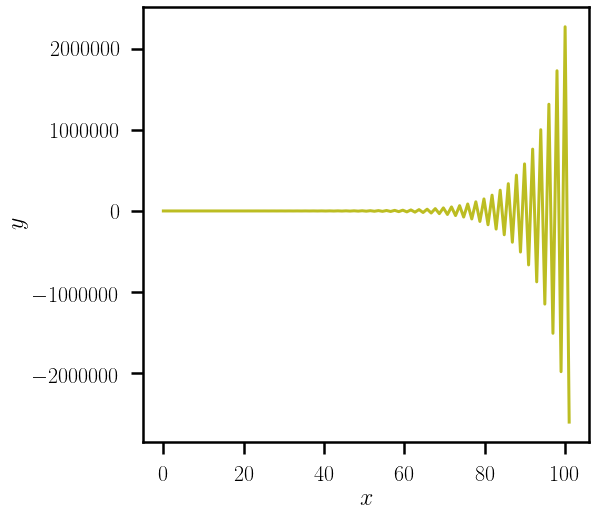

In [84]:
plt.figure(figsize=(8,8))
plt.plot(x,y,color='tab:olive')
plt.xlabel("$x$")
plt.ylabel("$y$")
#plt.xlim(0,70)
#plt.xticks(np.arange(0,70,10))